<a href="https://colab.research.google.com/github/Sankalan77/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [ ]:
df = pd.read_csv("Housing (1).csv")
print("First 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())

First 5 rows:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900  1.0  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671  2.0  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671  2.0  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622  3.0  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622  3.0  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     509 non-null    float64
 1   ZN       509 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     509 non-null    int64  
 4   NO

In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df.dropna()

In [ ]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [ ]:
print("\nCorrelation Matrix:")
print(df.corr())


Correlation Matrix:
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.201466  0.404636 -0.057508  0.419016 -0.222382  0.351884   
ZN      -0.201466  1.000000 -0.534350 -0.042233 -0.517905  0.313935 -0.574417   
INDUS    0.404636 -0.534350  1.000000  0.061267  0.762281 -0.396614  0.645260   
CHAS    -0.057508 -0.042233  0.061267  1.000000  0.089338  0.090011  0.083622   
NOX      0.419016 -0.517905  0.762281  0.089338  1.000000 -0.308212  0.729836   
RM      -0.222382  0.313935 -0.396614  0.090011 -0.308212  1.000000 -0.247288   
AGE      0.351884 -0.574417  0.645260  0.083622  0.729836 -0.247288  1.000000   
DIS     -0.379095  0.667435 -0.707405 -0.098680 -0.768248  0.207764 -0.748620   
RAD      0.624774 -0.313414  0.591955 -0.009255  0.608053 -0.214557  0.452843   
TAX      0.582472 -0.315926  0.719101 -0.037349  0.665294 -0.296333  0.502632   
PTRATIO  0.290053 -0.391850  0.382984 -0.121853  0.186854 -0.358881  0.267389   
B      

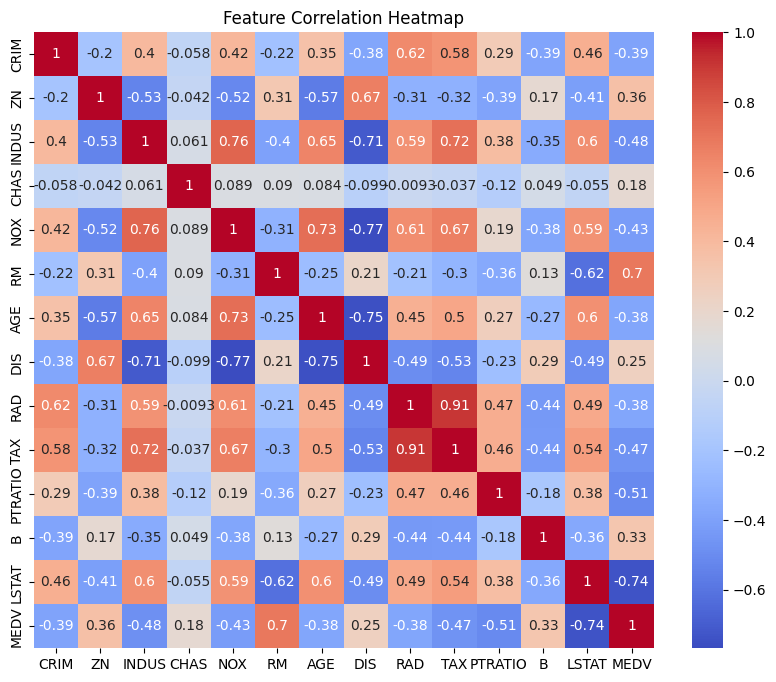

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
target_column = "MEDV"
features = df.drop(columns=[target_column])
target = df[target_column]

In [ ]:
features = features.select_dtypes(include=[np.number])

In [ ]:
print("\nSelected Features:")
print(features.columns)


Selected Features:
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
print("\nModel training completed.")


Model training completed.


In [ ]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("RMSE:", rmse)
print("R² Score:", r2)


Model Evaluation:
RMSE: 4.823094690029929
R² Score: 0.730153616776251


In [ ]:
coeff_df = pd.DataFrame({
    "Feature": features.columns,
    "Coefficient": model.coef_
})
print("\nCoefficient Interpretation:")
print(coeff_df)


Coefficient Interpretation:
    Feature  Coefficient
0      CRIM    -0.124763
1        ZN     0.042558
2     INDUS    -0.040324
3      CHAS     3.030529
4       NOX   -18.561378
5        RM     3.942722
6       AGE    -0.006601
7       DIS    -1.601934
8       RAD     0.306198
9       TAX    -0.012455
10  PTRATIO    -0.881672
11        B     0.008865
12    LSTAT    -0.470948


In [ ]:
joblib.dump(model, "house_price_model.pkl")
print("\nModel saved as: house_price_model.pkl")


Model saved as: house_price_model.pkl


In [ ]:
print("\nExample Predictions (first 5 rows of test data):")
example_input = X_test.head()
example_output = model.predict(example_input)
print(pd.DataFrame({
    "Input": example_input.values.tolist(),
    "Predicted Price": example_output
}))


Example Predictions (first 5 rows of test data):
                                               Input  Predicted Price
0  [0.11132, 0.0, 27.74, 0.0, 0.609, 5.983, 83.5,...        15.052527
1  [0.05646, 0.0, 12.83, 0.0, 0.437, 6.232, 53.7,...        21.200789
2  [0.09252, 30.0, 4.93, 0.0, 0.428, 6.606, 42.2,...        28.321253
3  [0.10008, 0.0, 2.46, 0.0, 0.488, 6.563, 95.6, ...        31.130878
4  [0.19133, 22.0, 5.86, 0.0, 0.431, 5.605, 70.2,...        13.469361
